# Research Methodology 

**Script:**
Is used to generate the word cloud of the hole documments selected to our study "Toward Flexible Data Collection of Driving Behavior"

**Description:**
The development of this script follows the following steps:
* Importing libraries and data (the 4 csv files exported from the literature resources used in our study);
* Extract the title and the abstract of each document and for every document;
* Create the word cloud of the title and abstact extracted;
* Plot a figure of each document contains the word cloud created previosly;
* (optional) Saved pectures in a folder than create a document word, in order to print those documents and analyze it manualy

**N.B:** In order to facilate the scripte it was applicated on a data frame that include a 30 articles exported on Web Of Science Librery

**Version:**
Mohammed AMEKSA - March 2019 - Original Script

In [1]:
# load pandas and numpy libraries, essential libraries for any scientific computation, including machine learning;
import pandas as pd
import numpy as np 

# load the wordcloud package to create the word cloud with the stopwords of english 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# load matplotlib librarie to plot the figures
import matplotlib.pyplot as plt

# load document librarie to generate documents word
from docx import Document
from docx.shared import Inches

##  Import the Data Frame

In [2]:
# import the .csv file 
df = pd.read_csv('data_frame.csv')
# display the first row
df.head(1)

Authors  \
0  Tselentis, Dimitrios I.; Vlahogianni, Eleni I....   

                                               Title  \
0  Driving safety efficiency benchmarking using s...   

                                            Abstract  \
0  This paper aims to provide a methodological fr...   

                         DOI  
0  10.1016/j.trc.2019.11.006

## Generate Word Cloud of all articles

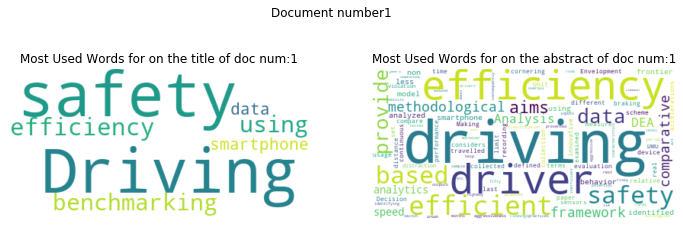

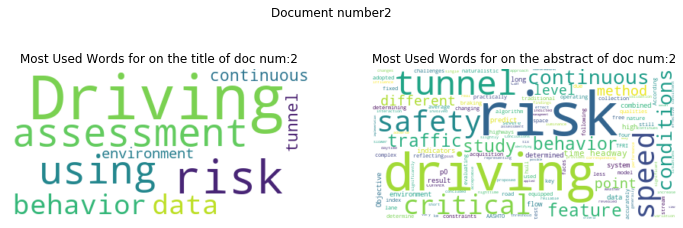

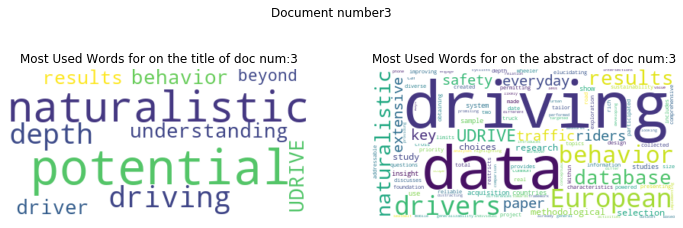

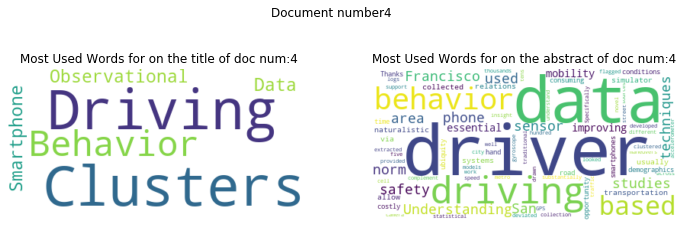

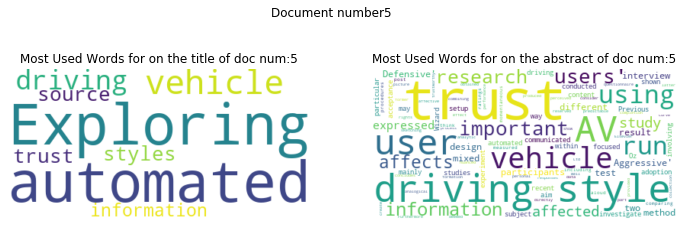

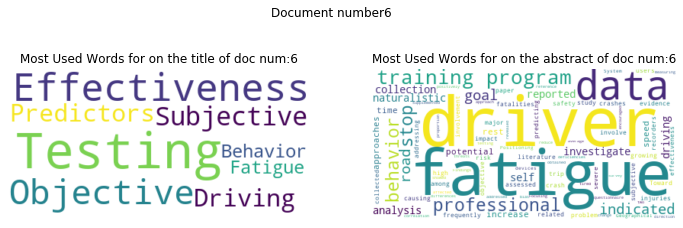

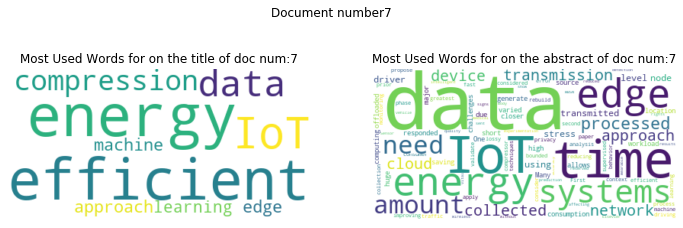

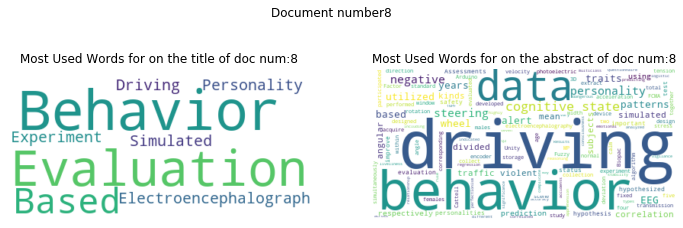

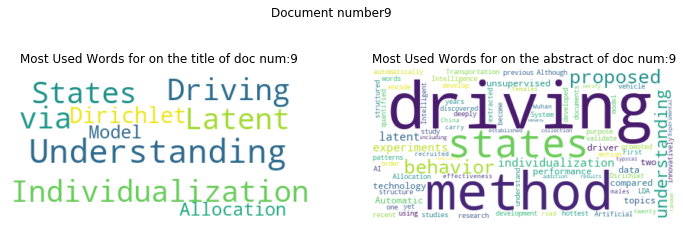

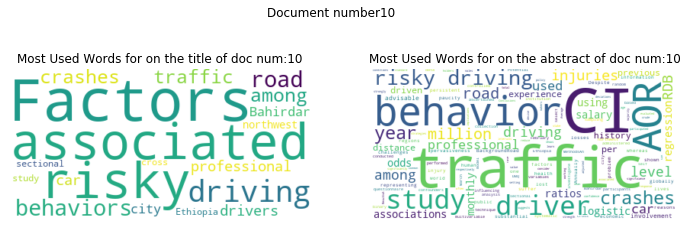

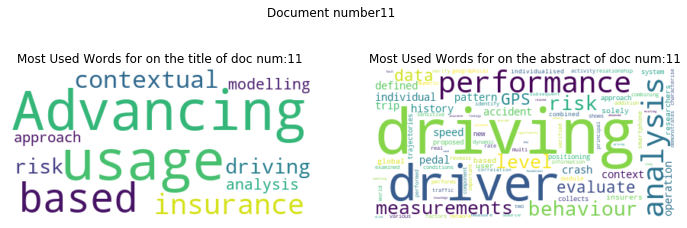

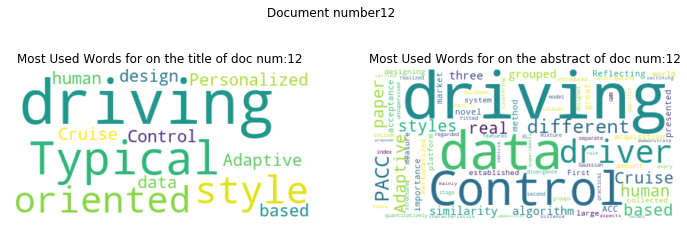

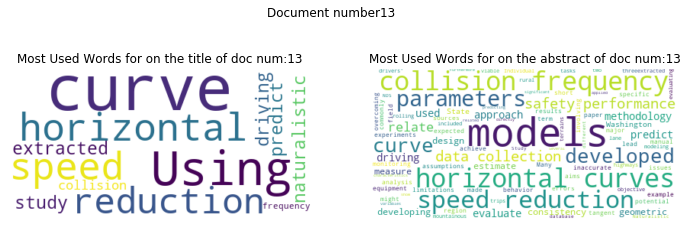

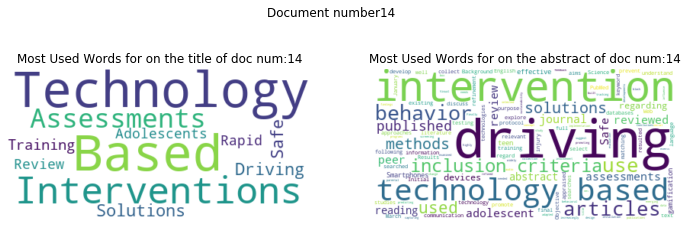

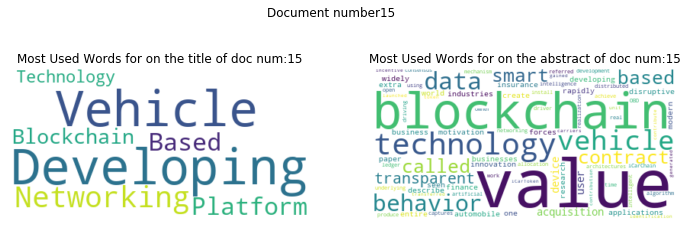

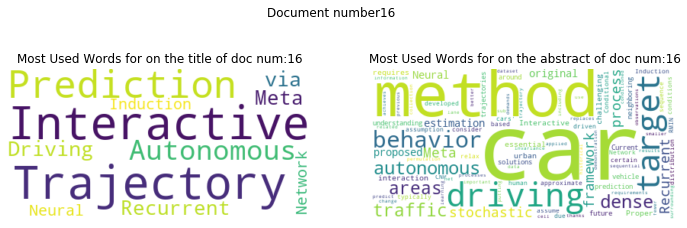

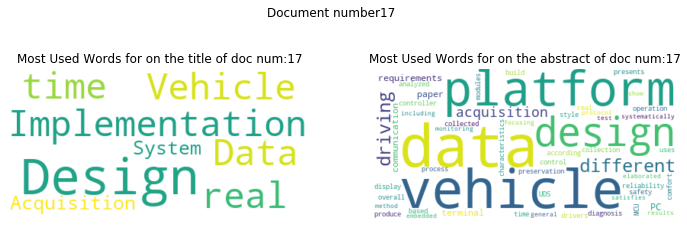

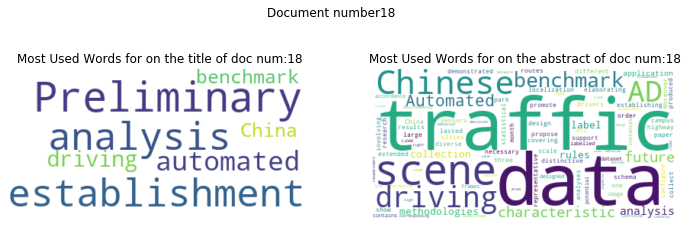

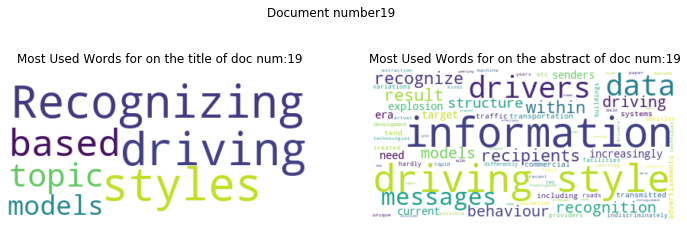

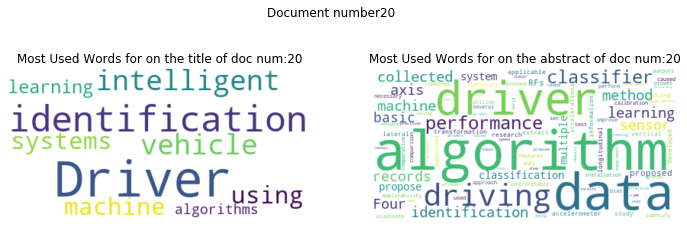

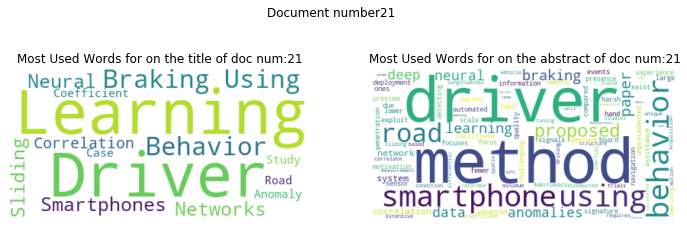

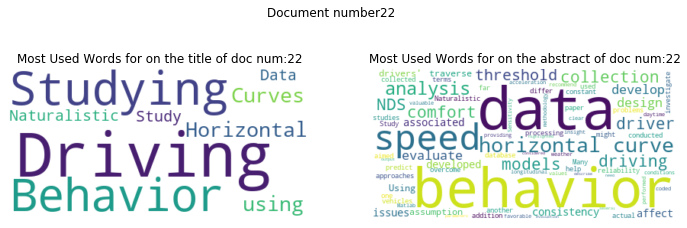

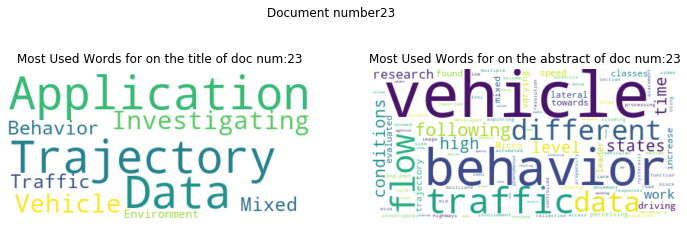

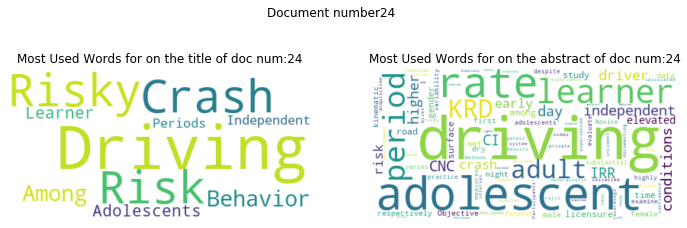

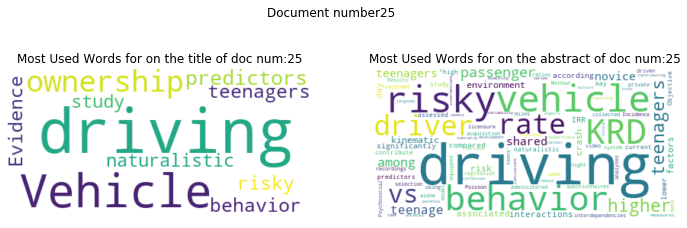

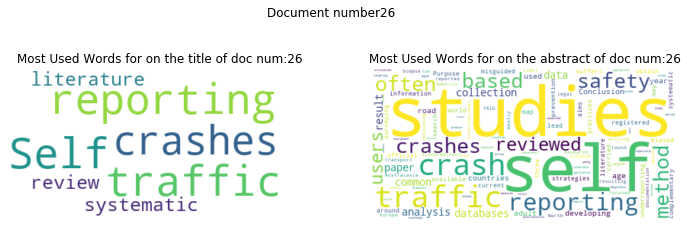

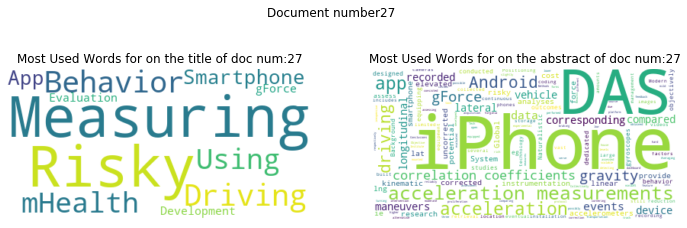

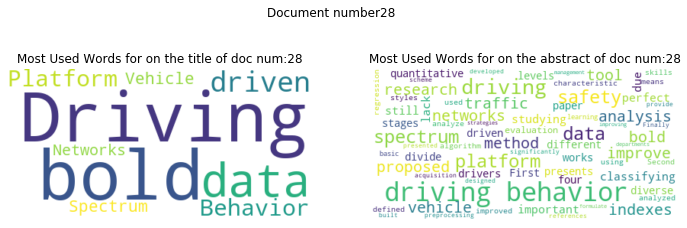

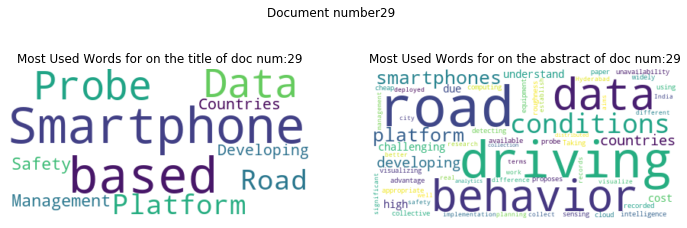

In [3]:
# start the counter that will browse the data frame
i=0

for a, b in zip(df.Title, df.Abstract):
    # Extract the title and the abstract
    title = df.Title[i]
    abstract = df.Abstract[i]
    # Create and generate a word cloud image of those shamps extracted
    wordcloud_title = WordCloud(background_color="white").generate(title)
    wordcloud_abstract = WordCloud(background_color="white").generate(abstract)
    # Create a figure of 12:4    
    f = plt.figure(figsize=(12,4))
    f.suptitle('Document number'+str(i+1))
    # plot the image of the title in the left
    f.add_subplot(1,2, 1)
    plt.title('Most Used Words for on the title of doc num:'+str(i+1))
    plt.imshow(wordcloud_title, interpolation='bilinear')
    plt.axis("off")
    # plot the image of the abstract in the right
    f.add_subplot(1,2, 2)
    plt.title('Most Used Words for on the abstract of doc num:'+str(i+1))
    plt.imshow(wordcloud_abstract, interpolation='bilinear')
    plt.axis("off")
    # Save and Store the image on a folder
    img_title = "img/image"+str(i+1)+".png"
    plt.savefig(img_title, format="png")
    plt.show(block=False)
    # Increment the counter
    i=i+1
    plt.show()


## (optional) Save the results in a single documment:
**this steep is optional, it helps in analysing results manualy**

In [4]:
document = Document()
sections = document.sections
margin= Inches(0.5)
for section in sections:
    section.top_margin = margin
    section.bottom_margin = margin
    section.left_margin = margin
    section.right_margin = margin
n_articles = len(df)
document.add_heading('Generated database\' wordCloud', 0)
p = document.add_paragraph('bellow wordcloud pectures of '+str(n_articles)+' articles:')
p = document.add_paragraph('====================================================')

for i in range(0,n_articles):
    img_path_titleSD = 'img/image'+str(i+1)+".png"
    document.add_picture(img_path_titleSD, width=Inches(7), height=Inches(1.75))
document.add_page_break()
document.save('WordCloud.docx')